In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers, models
from keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Data Loading and Preprocessing
train_data_dir = "/content/drive/MyDrive/art_auth_forged_dataset/training"
test_data_dir = "/content/drive/MyDrive/art_auth_forged_dataset/testing"
batch_size = 32
image_size = (500, 500)

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./1,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    validation_split=0.25
)
test_datagen = ImageDataGenerator(
    rescale=1./1,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    validation_split=0
)

train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Assuming binary classification (authentic or forged)
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 953 images belonging to 2 classes.
Found 316 images belonging to 2 classes.
Found 1385 images belonging to 2 classes.


In [ ]:
# Model Building
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Model Training
epochs = 30
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=validation_data
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc}')

# Save the model
model.save("/content/drive/MyDrive/art_authentication_model(1).keras")

Epoch 1/30
30/30 [==============================] - 21s 625ms/step - loss: 1052.9916 - accuracy: 0.7503 - val_loss: 1.3297 - val_accuracy: 0.8734
Epoch 2/30
30/30 [==============================] - 15s 498ms/step - loss: 0.5267 - accuracy: 0.8646 - val_loss: 0.7761 - val_accuracy: 0.8639
Epoch 3/30
30/30 [==============================] - 16s 528ms/step - loss: 0.4985 - accuracy: 0.8562 - val_loss: 0.8017 - val_accuracy: 0.8449
Epoch 4/30
30/30 [==============================] - 17s 553ms/step - loss: 0.3831 - accuracy: 0.8751 - val_loss: 1.0340 - val_accuracy: 0.8513
Epoch 5/30
30/30 [==============================] - 15s 489ms/step - loss: 0.3134 - accuracy: 0.8762 - val_loss: 0.9537 - val_accuracy: 0.8481
Epoch 6/30
30/30 [==============================] - 15s 497ms/step - loss: 0.3117 - accuracy: 0.8825 - val_loss: 1.4437 - val_accuracy: 0.8165
Epoch 7/30
30/30 [==============================] - 15s 497ms/step - loss: 0.2789 - accuracy: 0.8814 - val_loss: 0.8844 - val_accuracy: 0.8

In [ ]:
# Load the model and test data
model = tf.keras.models.load_model('/content/drive/MyDrive/art_authentication_model(1).keras')

y_true = test_data.classes
# Generate predictions
y_pred = model.predict(test_data)

44/44 [==============================] - 369s 8s/step


44/44 [==============================] - 253s 6s/step - loss: 1.2223 - accuracy: 0.8462
Test Accuracy: 0.8462094068527222
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1246
           1       0.08      0.06      0.07       139

    accuracy                           0.83      1385
   macro avg       0.49      0.49      0.49      1385
weighted avg       0.82      0.83      0.82      1385

Confusion Matrix:
 [[1148   98]
 [ 131    8]]


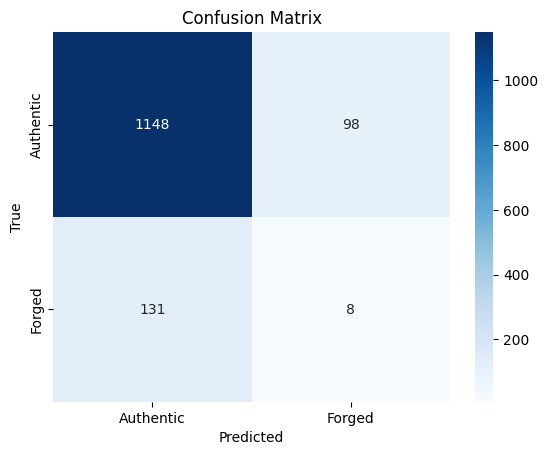

In [ ]:
# Threshold for binary classification
threshold = 0.5

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > threshold).astype(int)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc}')

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_binary))
conf_matrix = confusion_matrix(y_true, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Authentic', 'Forged'], yticklabels=['Authentic', 'Forged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Function to detect rotation between two images
def detect_rotation(image1_path, image2_path):
    # Load images
    image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Apply color filter to one of the images
    image1_filtered = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
    image1_filtered[:, :, 1:3] = 0  # Set green and red channels to 0

In [ ]:

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Function to calculate cosine similarity between two images
def calculate_similarity(img1_features, img2_features):
    img1_features = img1_features.reshape(1, -1)
    img2_features = img2_features.reshape(1, -1)
    similarity = cosine_similarity(img1_features, img2_features)
    return similarity[0][0]



    # Step 1: Feature Extraction
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(image1_filtered, None)
    kp2, des2 = orb.detectAndCompute(image2, None)

    # Step 2: Feature Matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Step 3: Homography Estimation
    if len(matches) > 4:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
        M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Step 4: Check Rotation
        angle = np.degrees(np.arctan2(M[1, 0], M[0, 0])) % 360
        if 85 < angle < 95 or 265 < angle < 275:
            print("Images are equal with rotation")
        else:
            print("Images are not equal or rotation is not dominant")

# Get paths to two images from the user
image1_path = input("Enter the path to the first image: ")
image2_path = input("Enter the path to the second image: ")

# Extract features from both images
img1_features = extract_features(image1_path, base_model)
img2_features = extract_features(image2_path, base_model)

# Calculate cosine similarity
similarity = calculate_similarity(img1_features, img2_features)

# Print the similarity score
print(f"Cosine Similarity: {similarity}")

# Print the percentage of matching
percentage_matching = similarity * 100
print(f"Percentage of Matching: {percentage_matching}%")

# Set a threshold for similarity to determine if images are duplicates
threshold = 0.75  # You can adjust this threshold based on your requirements

if similarity >= 0.75:
    print("The images are duplicates.")
elif similarity >= 0.5:
    print("The images are likely duplicates.")
else:
    print("The images are not duplicates.")

# Call the function to detect rotation
detect_rotation(image1_path, image2_path)


Enter the path to the first image: /content/Photo 1 - Coloured.jpg
Enter the path to the second image: /content/Photo coloured.jpg
1/1 [==============================] - 0s 17ms/step
Cosine Similarity: 0.7779463529586792
Percentage of Matching: 77.79463529586792%
The images are duplicates.
